# Solving a Second-Order Linear Differential Equation

In this Python script, we use the SymPy library to solve a second-order linear differential equation of the form:

$$f''(x) + 4f(x) = 0$$


where `f(x)` is the unknown function and `x` is the independent variable. This differential equation arises in a variety of physical and engineering problems, such as the vibration of a mass-spring system and the propagation of electromagnetic waves.

We then calculate the constants of integration by substituting the initial conditions `f(0) = C1` and `f(pi/4) = C2`, and finally substitute these constants back into the solution to obtain the final solution.

The Python script uses the following libraries:

- `sympy`: a Python library for symbolic mathematics
- `numpy`: a Python library for numerical computing
- `matplotlib`: a Python library for data visualization

In [7]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

## Definitinons

In [2]:
# Define the function and the symbol
f = sp.Function('f')
x = sp.Symbol('x')

# Define the differential equation
diff_eq = sp.Eq(sp.diff(f(x), x, 2) + 4*f(x), 0)

# Display the differential equation
display(diff_eq)

Eq(4*f(x) + Derivative(f(x), (x, 2)), 0)

## Solution

In [3]:
# Solve the differential equation
solution = sp.dsolve(diff_eq)

# Display the solution
display(solution)

Eq(f(x), C1*sin(2*x) + C2*cos(2*x))

### With respect initial contiditions

In [4]:
# Calculate the constants of integration
C1_sol = solution.subs({x : 0})
C2_sol = solution.subs({x : sp.pi/4})

# Display the constants of integration
display(C1_sol)
display(C2_sol)

# Substitute the constants of integration into the solution
solution = solution.subs({C1_sol.rhs : C1_sol.lhs,
                          C2_sol.rhs : C2_sol.lhs})

# Display the final solution
display(solution)

Eq(f(0), C2)

Eq(f(pi/4), C1)

Eq(f(x), f(0)*cos(2*x) + f(pi/4)*sin(2*x))

## Representation of a Second-Order Linear Differential Equation

In this example, we consider the solution to the second-order linear differential equation:

$$ f(x) = f(0)\cos(2x) + f(\frac{\pi}{4}\sin(2x) $$

We assume the initial conditions $f(0) = 0$ and $f(\pi/4) = 1$, which specify the value of the function and its first derivative at two points. Using these initial conditions, we obtain the specific solution:

$$ f(x) = \sin(2x) $$

The plot below shows the solution to the differential equation with the initial conditions included as red dots.

In [5]:
solution_print = solution.subs({f(0) : 0, f(sp.pi/4) : 1})
display(solution_print)

Eq(f(x), sin(2*x))

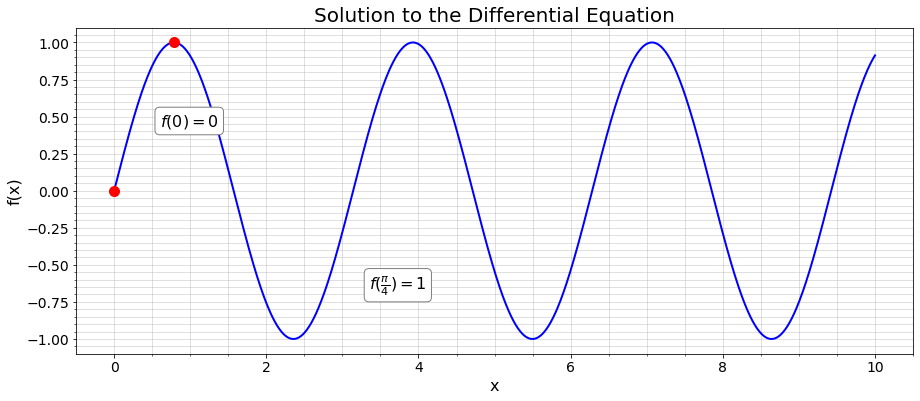

In [9]:
# Create a function from the SymPy expression
f_sympy = sp.lambdify(x, solution_print.rhs, 'numpy')

# Create a NumPy array of x values
x_vals = np.linspace(0, 10, 1000)

# Evaluate the function for the given x values
y_vals = f_sympy(x_vals)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(x_vals, y_vals, linewidth=2, color='blue')
ax.plot([0, sp.pi/4], [0, 1], 'ro', markersize=10)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('f(x)', fontsize=16)
ax.set_title('Solution to the Differential Equation', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(which='both', alpha=0.5)

# Add text boxes to show the initial conditions
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=1)
ax.text(0.1, 0.7, r'$f(0) = 0$', transform=ax.transAxes, fontsize=16, bbox=bbox_props)
ax.text(0.35, 0.2, r'$f(\frac{\pi}{4}) = 1$', transform=ax.transAxes, fontsize=16, bbox=bbox_props)

# Save the figure and show the plot
plt.savefig('differential_equation_solution.pdf', bbox_inches='tight')
plt.show()